In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = torch.linspace(-5, 5, 500)

y_sigmoid = torch.sigmoid(x).data.numpy()
y_relu = F.relu(x).data.numpy()
y_leaky_relu = F.leaky_relu(x, negative_slope=0.1).data.numpy()
y_softplus = F.softplus(x).data.numpy()

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.plot(x.data.numpy(), y_sigmoid, c='blue', label='sigmoid')
plt.ylim((-0.2,1.2))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x.data.numpy(), y_relu, c='blue', label='relu')
plt.ylim((-1.2, 5))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x.data.numpy(), y_leaky_relu, c='blue', label='leaky_relu')
plt.ylim((-1.2, 5))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x.data.numpy(), y_softplus, c='blue', label='softplus')
plt.ylim((-1.2, 5))
plt.legend(loc='best')
plt.show()

# NN

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = torch.linspace(-1, 1, 500)
y = x.pow(3) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [ ]:
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

In [ ]:
# define model
hidden1 = nn.Linear(1, 10, bias=True)
activation1 = nn.ReLU()

hidden2 = nn.Linear(10, 20, bias=True)
activation2 = nn.ReLU()

hidden3 = nn.Linear(20, 10, bias=True)
activation3 = nn.ReLU()

output = nn.Linear(10, 1, bias=True)

In [ ]:
model = nn.Sequential(hidden1, activation1, hidden2, activation2, hidden3, activation3, output)

In [ ]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

## Train

In [ ]:
for step in range(2000):
    pre = model(x) #순전파
    cost = loss(pre, y) #loss function 계산
    
    optimizer.zero_grad() #초기화
    cost.backward() #역전파
    optimizer.step() #가중치 개선
    
    if step % 400  == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=4)
        plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
        plt.show()

# Neural Networks for Gender Classification

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/NHIS_OPEN_GJ_2017.csv", encoding ='euc-kr')

FileNotFoundError: File b'data/NHIS_OPEN_GJ_2017.csv' does not exist

In [ ]:
# 연령 : (총 14개 그룹) 20~84세까지 5세 단위 그룹화, 85세 이상은 85+로 그룹화
# 흡연상태 : 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주여부 : 0(마시지 않은다), 1(마신다)
data.head()

In [ ]:
df = data[data.columns[[2,3,5,6,25,26]]]

In [ ]:
df.isnull().any()

In [ ]:
df = df.dropna()

In [ ]:
print("The number of data :",len(df))
df.isnull().any()

## Split

In [ ]:
df_train, df_test = train_test_split(df, test_size = 0.1, random_state = 0)

In [ ]:
# y = 0(남자) or 1(여자) 로 변환
x_train  = torch.from_numpy(df_train.values[:, 1:]).float()
y_train  = torch.from_numpy(df_train.values[:, 0]).float() - 1

x_test  = torch.from_numpy(df_test.values[:, 1:]).float()
y_test  = torch.from_numpy(df_test.values[:, 0]).float() - 1

In [ ]:
# x, y 데이터 결합
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

In [ ]:
batch_size = 200

train_loader = DataLoader(dataset=train_data, batch_size = batch_size, shuffle=True,num_workers=1)

## model

In [ ]:
model = nn.Sequential(nn.Linear(5, 100), nn.ReLU(), nn.Linear(100, 10), nn.ReLU(), nn.Linear(10,1), nn.Sigmoid())

In [ ]:
print(model)

In [ ]:
loss = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #Adam

In [ ]:
num_epochs = 10

In [ ]:
for epoch in range(num_epochs):
    
    total_batch = len(train_data) // batch_size
    
    for i, (batch_data, batch_labels) in enumerate(train_loader):
        
        X = batch_data
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y.view(-1, 1))
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

In [ ]:
model.eval()

correct = 0
total = 0

for data, label in test_data:
    
    output = model(data)
    
    pre = (output > 0.5).float()
    total += 1
    correct += (pre == label).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

# MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data = dsets.MNIST(root='data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

test_data = dsets.MNIST(root='data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

0it [00:00, ?it/s]

100%|█████████▉| 9895936/9912422 [00:10<00:00, 1794881.59it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


 57%|█████▋    | 16384/28881 [00:00<00:00, 74794.35it/s]
32768it [00:00, 54369.66it/s]                           
0it [00:00, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz



 99%|█████████▉| 1638400/1648877 [00:05<00:00, 638522.97it/s]
1654784it [00:05, 328446.75it/s]                             
0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz



  0%|          | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 20853.59it/s]            

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


9920512it [00:30, 1794881.59it/s]                             

In [4]:
train_data.data.size(), test_data.data.size()

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

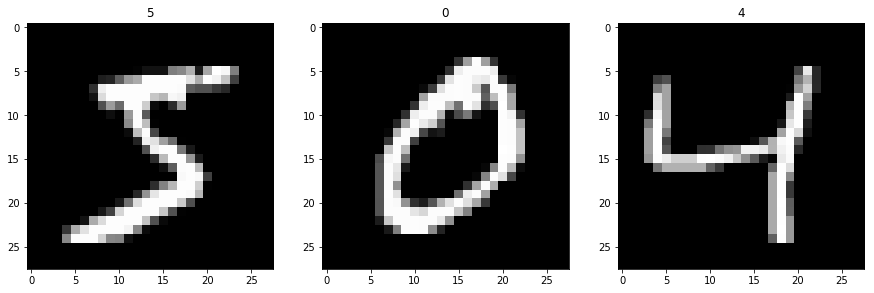

In [5]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(train_data.targets[0].item())
ax1.imshow(train_data.data[0,:,:].numpy(), cmap='gray')

ax2.set_title(train_data.targets[1].item())
ax2.imshow(train_data.data[1,:,:].numpy(), cmap='gray')

ax3.set_title(train_data.targets[2].item())
ax3.imshow(train_data.data[2,:,:].numpy(), cmap='gray')

## Batch

In [6]:
batch_size = 100

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=1)

In [7]:
model = nn.Sequential(nn.Linear(784, 485), nn.ReLU(), nn.Linear(485, 10))

In [8]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [9]:
num_epochs = 8

In [10]:
for epoch in range(num_epochs):
    
    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/8], lter [300/600], Loss: 2.2547
Epoch [1/8], lter [600/600], Loss: 2.1748
Epoch [2/8], lter [300/600], Loss: 2.0875
Epoch [2/8], lter [600/600], Loss: 2.0083
Epoch [3/8], lter [300/600], Loss: 1.9377
Epoch [3/8], lter [600/600], Loss: 1.8531
Epoch [4/8], lter [300/600], Loss: 1.7240
Epoch [4/8], lter [600/600], Loss: 1.6390
Epoch [5/8], lter [300/600], Loss: 1.4707
Epoch [5/8], lter [600/600], Loss: 1.4436
Epoch [6/8], lter [300/600], Loss: 1.3779
Epoch [6/8], lter [600/600], Loss: 1.2914
Epoch [7/8], lter [300/600], Loss: 1.1358
Epoch [7/8], lter [600/600], Loss: 1.1089
Epoch [8/8], lter [300/600], Loss: 1.0608
Epoch [8/8], lter [600/600], Loss: 1.0152
Learning Finished!


In [11]:
model.eval()

correct = 0
total = 0

for images, labels in test_data:
    
    images  = images.view(-1, 28 * 28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 82.770000 %


In [12]:
r = random.randint(0, len(test_data)-1)
X_single_data = test_data.data[r:r + 1].view(-1,28*28).float()
Y_single_data = test_data.targets[r:r + 1]

Label :  [9]
Prediction :  [9]


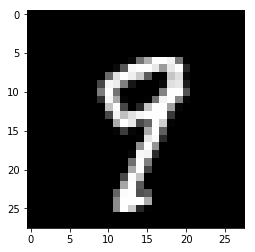

In [15]:
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())